In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import operator

In [3]:
# Store filepath in a variable
olympics_file = "Olympic_Athlete_Data2.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
olympics_df = pd.read_csv(olympics_file)

# Show just the header
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,12068,Arthur Charles Blake,M,24.0,NaN,NaN,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver
1,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,100M Men,Gold
2,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Gold
3,49185,Fritz Hofmann,M,24.0,167.0,56.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,100M Men,Silver
4,21795,Ellery Harding Clark,M,22.0,180.0,NaN,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,Gold


In [4]:
# Create dataframe with only necesary columns, select only gold medal and reorder columns
summer_olympics_df = olympics_df[["Sex", "Age", "Height", "Weight",
                       "Year", "Season", "Event", "Medal"]]
summer_olympics_df = summer_olympics_df.loc[summer_olympics_df["Medal"] == "Gold"]
summer_olympics_df = summer_olympics_df[["Season", "Year", "Event", "Medal",
                                         "Sex", "Age", "Height", "Weight"]]
summer_olympics_df.head()

,Season,Year,Event,Medal,Sex,Age,Height,Weight
1,Summer,1896,100M Men,Gold,M,21.0,183.0,66.0
2,Summer,1896,Athletics Men's 400 metres,Gold,M,21.0,183.0,66.0
4,Summer,1896,Athletics Men's Long Jump,Gold,M,22.0,180.0,NaN
7,Summer,1896,Athletics Men's Triple Jump,Gold,M,27.0,175.0,72.0
8,Summer,1896,Athletics Men's 110 metres Hurdles,Gold,M,23.0,176.0,66.0


In [5]:
# Create individual dataframes for each events
m_highjump_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "High Jump Men"]
w_highjump_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "High Jump Women"]
m_discus_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "Discus Throw Men"]
w_discus_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "Discus Throw Women"]
m_100_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "100M Men"]
w_100_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "100M Women"]
m_10000_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "10000M Men"]
w_10000_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "10000M Women"]
m_800_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "800M Men"]
w_800_df = summer_olympics_df.loc[summer_olympics_df["Event"] == "800M Women"]

In [6]:
m_highjump_df.dtypes


Season     object
Year        int64
Event      object
Medal      object
Sex        object
Age       float64
Height    float64
Weight    float64
dtype: object

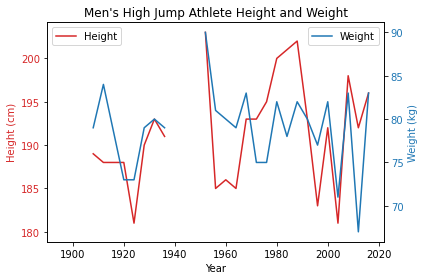

In [17]:
#Plot mens athlete attributes for the high jump
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(m_highjump_df["Year"], m_highjump_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(m_highjump_df["Year"], m_highjump_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper right")
plt.title("Men's High Jump Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Men's High Jump Height and Weights.png")
plt.show()

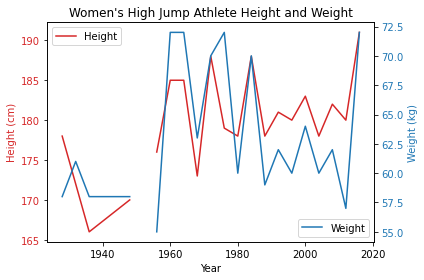

In [16]:
#Plot womens athlete attributes for the high jump
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(w_highjump_df["Year"], w_highjump_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_highjump_df["Year"], w_highjump_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Women's High Jump Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Woen's High Jump Height and Weights.png")
plt.show()

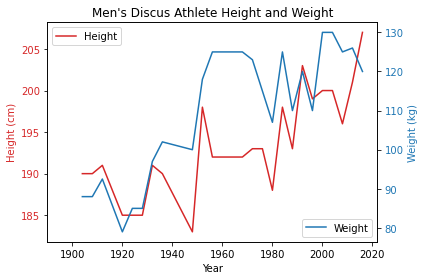

In [19]:
#Plot mens athlete attributes for the discus throw
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(m_discus_df["Year"], m_discus_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(m_discus_df["Year"], m_discus_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Men's Discus Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Men's Discus Height and Weights.png")
plt.show()

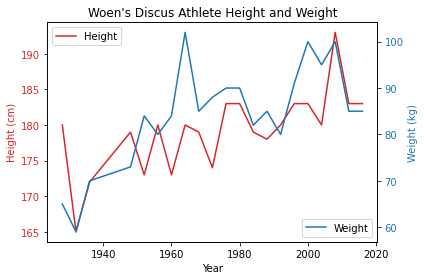

In [20]:
#Plot womens athlete attributes for the discus throw
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(w_discus_df["Year"], w_discus_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_discus_df["Year"], w_discus_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Woen's Discus Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Women's Discus Height and Weights.png")
plt.show()

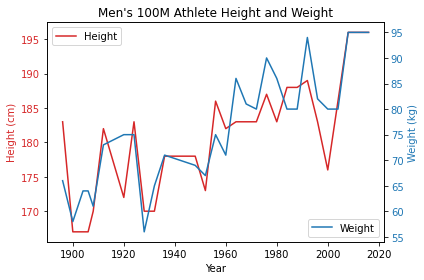

In [21]:
#Plot mens athlete attributes for the 100 meters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(m_100_df["Year"], m_100_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(m_100_df["Year"], m_100_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Men's 100M Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Men's 100M Height and Weights.png")
plt.show()

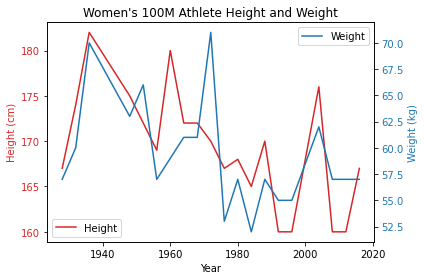

In [22]:
#Plot womens athlete attributes for the 100 meters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(w_100_df["Year"], w_100_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_100_df["Year"], w_100_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper right")
plt.title("Women's 100M Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Women's 100M Height and Weights.png")
plt.show()

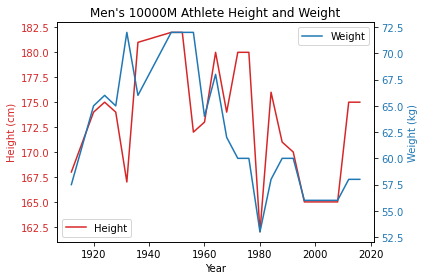

In [23]:
#Plot mens athlete attributes for the 10000 meters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(m_10000_df["Year"], m_10000_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(m_10000_df["Year"], m_10000_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper right")
plt.title("Men's 10000M Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Men's 10000M Height and Weights.png")
plt.show()

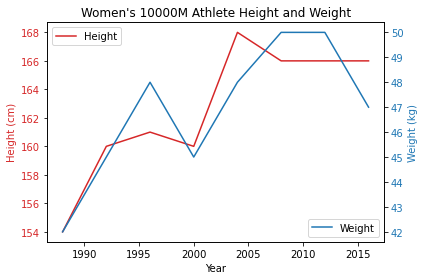

In [24]:
#Plot womens athlete attributes for the 10000 meters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(w_10000_df["Year"], w_10000_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_10000_df["Year"], w_10000_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Women's 10000M Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Women's 10000M Height and Weights.png")
plt.show()

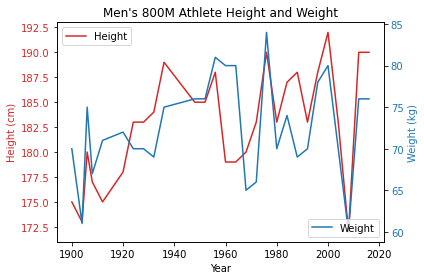

In [26]:
#Plot mens athlete attributes for the 800 meters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(m_800_df["Year"], m_800_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(m_800_df["Year"], m_800_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Men's 800M Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Men's 800M Height and Weights.png")
plt.show()

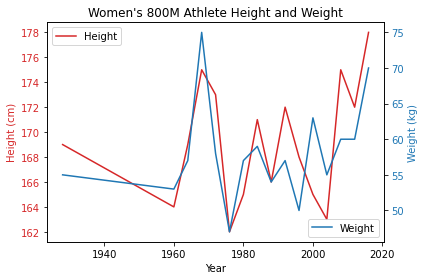

In [27]:
#Plot womens athlete attributes for the 800 meters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color=color)
ax1.plot(w_800_df["Year"], w_800_df["Height"], color=color, label="Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_800_df["Year"], w_800_df["Weight"], color=color, label="Weight")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="lower right")
plt.title("Women's 800M Athlete Height and Weight")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Women's 800M Height and Weights.png")
plt.show()